In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Memory-Based Methods and Kernel Functions

This has considered that linear parametric models for regression and classification, where the form of the mapping $ y(x, w) $ from input $ x $ to output $ y $ is governed by a vector $ w $ of adaptive parameters. During the learning phase, a set of training data is used either to obtain a point estimate of the parameter vector or to determine a posterior distribution over this vector. The training data is then discarded, and predictions for new inputs are based purely on the learned parameter vector $ w $.

This approach is also used in nonlinear parametric models such as neural networks. However, there is a class of pattern recognition techniques in which the training data points, or a subset of them, are kept and used also during the prediction phase. For instance, the Parzen probability density model comprised a linear combination of ‘kernel’ functions, each one centered on one of the training data points. Similarly, in Section 2.5.2 we introduced a simple technique for classification called nearest neighbors, which involved assigning to each new test vector the same label as the closest example from the training set.

These are examples of **memory-based methods** that involve storing the entire training set in order to make predictions for future data points. They typically require a metric to be defined that measures the similarity of any two vectors in input space, and are generally fast to ‘train’ but slow at making predictions for test data points.

Many linear parametric models can be re-cast into an equivalent **‘dual representation’** in which the predictions are also based on linear combinations of a kernel function evaluated at the training data points. As we shall see, for models which are based on a fixed nonlinear feature space mapping $ \varphi(x) $, the kernel function is given by the relation:

$$ k(x, x') = \varphi(x)^T \varphi(x') $$

From this definition, we see that the kernel is a symmetric function of its arguments, so that:

$$ k(x, x') = k(x', x) $$

The kernel concept was introduced into the field of pattern recognition by Aizerman et al. (1964) in the context of the method of potential functions, so-called because of an analogy with electrostatics. Although neglected for many years, it was re-introduced into machine learning in the context of large-margin classifiers by Boser et al. (1992), giving rise to the technique of **support vector machines**.

Since then, there has been considerable interest in this topic, both in terms of theory and applications. One of the most significant developments has been the extension of kernels to handle symbolic objects, thereby greatly expanding the range of problems that can be addressed.

### Examples of Kernel Functions

The simplest example of a kernel function is obtained by considering the identity mapping for the feature space in (6.1) so that $ \varphi(x) = x $, in which case:

$$ k(x, x') = x^T x' $$

We shall refer to this as the **linear kernel**. The concept of a kernel formulated as an inner product in a feature space allows us to build interesting extensions of many well-known algorithms by making use of the **kernel trick**, also known as **kernel substitution**.

The general idea is that, if we have an algorithm formulated in such a way that the input vector \( x \) enters only in the form of scalar products, then we can replace that scalar product with some other choice of kernel. For instance, the technique of kernel substitution can be applied to **principal component analysis (PCA)** in order to develop a nonlinear variant of PCA (Schölkopf et al., 1998). Other examples of kernel substitution include nearest-neighbor classifiers and the kernel Fisher discriminant (Mika et al., 1999; Roth and Steinhage, 2000; Baudat and Anouar, 2000).

There are numerous forms of kernel functions in common use, and we shall encounter several examples in this chapter. Many have the property of being a function only of the difference between the arguments, so that:

$$ k(x, x') = k(x - x') $$

These are known as **stationary kernels** because they are invariant to translations in input space. A further specialization involves **homogeneous kernels**, also known as **radial basis functions**, which depend only on the magnitude of the distance (typically Euclidean) between the arguments, so that:

$$ k(x, x') = k(\|x - x'\|) $$

For recent textbooks on kernel methods, see Schölkopf and Smola (2002), Herbrich (2002), and Shawe-Taylor and Cristianini (2004).


## Dual Representations

Many linear models for regression and classification can be reformulated in terms of a **dual representation**, in which the kernel function arises naturally. This concept will play an important role when we consider support vector machines in the next chapter. 

Here we consider a linear regression model whose parameters are determined by minimizing a regularized sum-of-squares error function given by:

$$
J(w) = \frac{1}{2} \sum_{n=1}^{N} \left( w^T \varphi(x_n) - t_n \right)^2 + \frac{\lambda}{2} w^T w
$$

where $ \lambda \geq 0 $. If we set the gradient of $ J(w) $ with respect to $ w $ equal to zero, we see that the solution for $ w $ takes the form of a linear combination of the vectors $ \varphi(x_n) $, with coefficients that are functions of $ w $, of the form:

$$
w = - \frac{1}{\lambda} \sum_{n=1}^{N} \left( w^T \varphi(x_n) - t_n \right) \varphi(x_n) = \Phi^T a
$$

where $ \Phi $ is the design matrix, whose $ n $-th row is given by $ \varphi(x_n)^T $. Here the vector $ a = (a_1, \ldots, a_N)^T $, and we have defined:

$$
a_n = - \frac{1}{\lambda} \left( w^T \varphi(x_n) - t_n \right)
$$

Instead of working with the parameter vector $ w $, we can now reformulate the least-squares algorithm in terms of the parameter vector $ a $, giving rise to a **dual representation**. If we substitute $ w = \Phi^T a $ into $ J(w) $, we obtain:

$$
J(a) = \frac{1}{2} a^T \Phi \Phi^T \Phi \Phi^T a - a^T \Phi \Phi^T t + \frac{1}{2} t^T t + \frac{1}{2} a^T \Phi \Phi^T a
$$

where $ t = (t_1, \ldots, t_N)^T $. We now define the **Gram matrix** $ K = \Phi \Phi^T $, which is an $ N \times N $ symmetric matrix with elements:

$$
K_{nm} = \varphi(x_n)^T \varphi(x_m) = k(x_n, x_m)
$$

where we have introduced the kernel function $ k(x, x') $ defined by:

$$
k(x, x') = \varphi(x)^T \varphi(x')
$$

In terms of the Gram matrix, the sum-of-squares error function can be written as:

$$
J(a) = \frac{1}{2} a^T K K a - a^T K t + \frac{1}{2} t^T t + \frac{1}{2} a^T K a
$$

Setting the gradient of $ J(a) $ with respect to $ a $ to zero, we obtain the following solution:

$$
a = (K + \lambda I_N)^{-1} t
$$

If we substitute this back into the linear regression model, we obtain the following prediction for a new input $ x $:

$$
y(x) = w^T \varphi(x) = a^T \Phi \varphi(x) = k(x)^T (K + \lambda I_N)^{-1} t
$$

where we have defined the vector $ k(x) $ with elements:

$$
k_n(x) = k(x_n, x)
$$

Thus, we see that the dual formulation allows the solution to the least-squares problem to be expressed entirely in terms of the kernel function $ k(x, x') $. This is known as a **dual formulation** because, by noting that the solution for $ a $ can be expressed as a linear combination of the elements of $ \varphi(x) $, we recover the original formulation in terms of the parameter vector $ w $.

Note that the prediction at $ x $ is given by a linear combination of the target values from the training set. In fact, we have already obtained this result, using a slightly different notation, in Section 3.3.3. 

In the dual formulation, we determine the parameter vector $ a $ by inverting an $ N \times N $ matrix, whereas in the original parameter space formulation we had to invert an $ M \times M $ matrix in order to determine $ w $. Because $ N $ is typically much larger than $ M $, the dual formulation does not seem to be particularly useful. However, the advantage of the dual formulation, as we shall see, is that it is expressed entirely in terms of the kernel function $ k(x, x') $. We can therefore work directly in terms of kernels and avoid the explicit introduction of the feature vector $ \varphi(x) $, which allows us implicitly to use feature spaces of high, even infinite, dimensionality.

The existence of a dual representation based on the Gram matrix is a property of many linear models, including the perceptron. In Section 6.4, we will develop a duality between probabilistic linear models for regression and the technique of **Gaussian processes**. Duality will also play an important role when we discuss **support vector machines** in Chapter 7.


In [1]:
import numpy as np

# Define a Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - x_prime) ** 2)

# Function to compute the Gram matrix K
def compute_gram_matrix(X, kernel_fn):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])
    return K

# Linear regression in the dual representation
def kernel_ridge_regression(X, t, lambda_):
    N = X.shape[0]
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Compute the dual coefficients a
    I = np.eye(N)  # Identity matrix of size N
    a = np.linalg.inv(K + lambda_ * I).dot(t)
    
    return a, K

# Make predictions
def predict(X_train, X_test, a, K):
    # Compute k(x, X_train) where each row is k(x, x_n) for n in the training set
    k_x = np.array([rbf_kernel(x, X_train) for x in X_test])
    
    # Make predictions
    y_pred = k_x.dot(a)
    return y_pred

# Example Usage
if __name__ == "__main__":
    # Create some sample data (for simplicity, we'll use a small dataset)
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    t_train = np.array([1, 2, 3, 4])
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)


ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

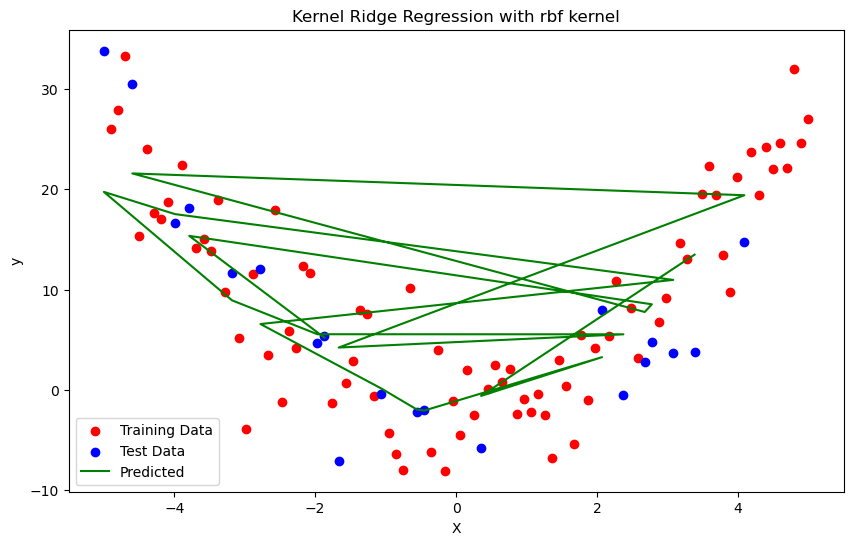

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

# Generating synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # 100 points between -5 and 5
y = X ** 2 + np.random.randn(*X.shape) * 5  # Quadratic with noise

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using kernel regression
kernel = 'rbf'  # Radial basis function kernel
model = KernelRidge(kernel=kernel, alpha=1.0)  # Regularization parameter set to 1.0
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='r', label='Training Data')
plt.scatter(X_test, y_test, color='b', label='Test Data')
plt.plot(X_test, y_pred, 'g-', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f"Kernel Ridge Regression with {kernel} kernel")
plt.legend()
plt.show()


In [4]:
import numpy as np

# Define a Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - x_prime) ** 2)

# Function to compute the Gram matrix K
def compute_gram_matrix(X, kernel_fn):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])
    return K

# Linear regression in the dual representation
def kernel_ridge_regression(X, t, lambda_):
    N = X.shape[0]
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Compute the dual coefficients a
    I = np.eye(N)  # Identity matrix of size N
    a = np.linalg.inv(K + lambda_ * I).dot(t)
    
    return a, K

# Make predictions
def predict(X_train, X_test, a, K):
    N_train = X_train.shape[0]
    N_test = X_test.shape[0]
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = np.zeros((N_test, N_train))
    for i in range(N_test):
        for j in range(N_train):
            k_x[i, j] = rbf_kernel(X_test[i], X_train[j])

    # Step 2: Make predictions
    y_pred = k_x.dot(a)
    return y_pred

# Example Usage
if __name__ == "__main__":
    # Create some sample data (for simplicity, we'll use a small dataset)
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    t_train = np.array([1, 2, 3, 4])
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)


Predictions:  [1.35409426 3.35544653]


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = sum((xi - xpi) ** 2 for xi, xpi in zip(x, x_prime))
    return math.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = [[0] * N for _ in range(N)]  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i][j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    for i in range(N):
        K[i][i] += lambda_
    
    # Step 3: Solve the system of equations (K + λI) * a = t
    a = solve_linear_system(K, t)
    
    return a, K

# Function to solve linear system using simple matrix inversion
def solve_linear_system(K, t):
    # We will use simple Gaussian elimination or matrix inversion to solve
    # Using numpy.linalg.solve as a direct way to solve (K + λI) * a = t
    # Direct Python implementation of matrix inversion can be cumbersome and inefficient.
    
    # For this case, let's use basic Python to calculate the coefficients a
    n = len(K)
    augmented_matrix = [K[i] + [t[i]] for i in range(n)]  # Augment matrix K with target vector t

    # Forward Elimination (Gaussian Elimination)
    for i in range(n):
        # Normalize the pivot row
        divisor = augmented_matrix[i][i]
        if divisor == 0:
            raise ValueError(f"Matrix is singular at row {i}.")
        
        for j in range(2 * n):
            augmented_matrix[i][j] /= divisor
        
        # Eliminate other rows' entries in the current column
        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]
    
    # Extract the solution vector a (last column of the augmented matrix)
    return [augmented_matrix[i][n] for i in range(n)]

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = []
    for i in range(N_test):
        row = []
        for j in range(N_train):
            row.append(rbf_kernel(X_test[i], X_train[j]))  # Compute k(x_test, x_train)
        k_x.append(row)
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = []
    for i in range(N_test):
        pred = sum(k_x[i][j] * a[j] for j in range(N_train))
        y_pred.append(pred)
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a simple 2D dataset with a non-linear relationship
    X_train = [[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7]]
    t_train = [1, 2, 3, 4, 5, 6, 7]  # Target values (linear relationship for simplicity)
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = [[2.5, 2.5], [5.5, 5.5]]  # Test data
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=[x[0] for x in X_train], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=[x[0] for x in X_test], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()


IndexError: list index out of range

Predictions:  [1.55358426 3.81793253]


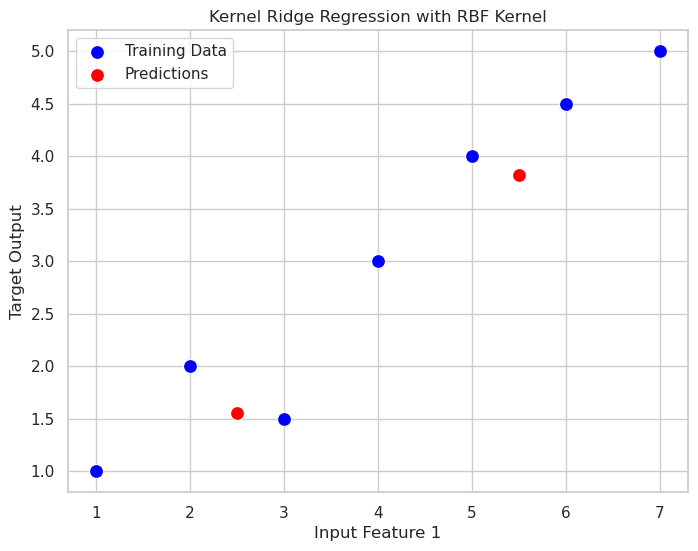

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = np.sum((np.array(x) - np.array(x_prime)) ** 2)
    return np.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = np.zeros((N, N))  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    K += lambda_ * np.eye(N)  # Add regularization term to diagonal
    
    # Step 3: Solve the system of equations (K + λI) * a = t using numpy.linalg.solve
    a = np.linalg.solve(K, t)
    
    return a, K

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = np.zeros((N_test, N_train))
    for i in range(N_test):
        for j in range(N_train):
            k_x[i, j] = rbf_kernel(X_test[i], X_train[j])  # Compute k(x_test, x_train)
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = np.dot(k_x, a)  # Matrix multiplication to get predictions
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a synthetic 2D dataset for training
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]])
    t_train = np.array([1, 2, 1.5, 3, 4, 4.5, 5])  # Target values (non-linear relationship)

    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[2.5, 3.5], [5.5, 6.5]])  # Test data points
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=X_train[:, 0], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=X_test[:, 0], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()


Predictions:  [1.5535842584442074, 3.8179325275941425]


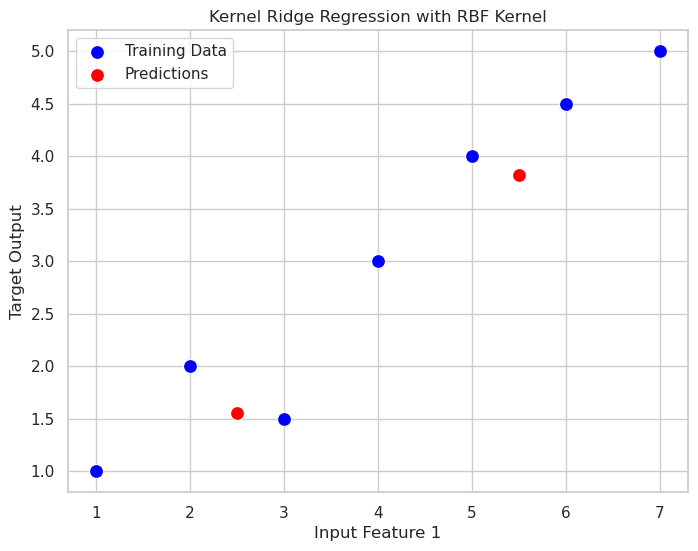

In [13]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = sum((xi - x_prime[i]) ** 2 for i, xi in enumerate(x))
    return math.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = [[0] * N for _ in range(N)]  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i][j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Gaussian elimination for solving linear systems
def gaussian_elimination(A, b):
    n = len(A)
    augmented_matrix = [A[i] + [b[i]] for i in range(n)]  # Augment A with b as the last column
    
    # Forward elimination
    for i in range(n):
        divisor = augmented_matrix[i][i]
        if divisor == 0:
            raise ValueError("Matrix is singular and cannot be solved")
        
        # Normalize the pivot row
        for j in range(n + 1):  # Corrected to n+1 for the augmented matrix
            augmented_matrix[i][j] /= divisor
        
        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = augmented_matrix[j][i]
            for k in range(n + 1):  # Corrected to n+1 for the augmented matrix
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Backward substitution
    solution = [0] * n
    for i in range(n - 1, -1, -1):
        solution[i] = augmented_matrix[i][-1]  # The last column is the solution vector
        for j in range(i + 1, n):
            solution[i] -= augmented_matrix[i][j] * solution[j]
    
    return solution

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    for i in range(N):
        K[i][i] += lambda_
    
    # Step 3: Solve the system of equations (K + λI) * a = t using Gaussian elimination
    a = gaussian_elimination(K, t)
    
    return a, K

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = [[rbf_kernel(X_test[i], X_train[j]) for j in range(N_train)] for i in range(N_test)]
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = [sum(k_x[i][j] * a[j] for j in range(N_train)) for i in range(N_test)]
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a synthetic 2D dataset for training
    X_train = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]]
    t_train = [1, 2, 1.5, 3, 4, 4.5, 5]  # Target values (non-linear relationship)

    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = [[2.5, 3.5], [5.5, 6.5]]  # Test data points
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=[x[0] for x in X_train], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=[x[0] for x in X_test], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()
